# Business Case: LoanTap Logistic Regression

- LoanTap is an online platform committed to delivering customized loan products to millennials. 
- They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.


- The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

- LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:


    - Personal Loan
    - EMI Free Loan
    - Personal Overdraft
    - Advance Salary Loan


- This case study will focus on the underwriting process behind Personal Loan only


## Problem Statement:

- Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?



## Data dictionary:

1. loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2. term : The number of payments on the loan. Values are in months and can be either 36 or 60.
3. int_rate : Interest Rate on the loan
4. installment : The monthly payment owed by the borrower if the loan originates.
5. grade : LoanTap assigned loan grade
6. sub_grade : LoanTap assigned loan subgrade
7. emp_title :The job title supplied by the Borrower when applying for the loan.*
8. emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
9. home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
10. annual_inc : The self-reported annual income provided by the borrower during registration.
11. verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
12. issue_d : The month which the loan was funded
13. loan_status : Current status of the loan - Target Variable
14. purpose : A category provided by the borrower for the loan request.
15. title : The loan title provided by the borrower
16. dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
17. earliest_cr_line :The month the borrower's earliest reported credit line was opened
18. open_acc : The number of open credit lines in the borrower's credit file.
19. pub_rec : Number of derogatory public records
20. revol_bal : Total credit revolving balance
21. revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
22. total_acc : The total number of credit lines currently in the borrower's credit file
23. initial_list_status : The initial listing status of the loan. Possible values are – W, F
24. application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
25. mort_acc : Number of mortgage accounts.
26. pub_rec_bankruptcies : Number of public record bankruptcies
27. Address: Address of the individual



        Concept Used:

        Exploratory Data Analysis
        Feature Engineering
        Logistic Regression
        Precision Vs Recall Tradeoff




    Simple Feature Engineering steps:
    E.g.: Creation of Flags- If value greater than 1.0 then 1 else 0. This can be done on:

    1. Pub_rec
    2. Mort_acc
    3. Pub_rec_bankruptcies

- Missing values and Outlier Treatment
- Scaling - Using MinMaxScaler or StandardScaler
- Used Logistic Regression Model from Sklearn/Statsmodel library and explain the results

#####  Results Evaluation:

- Classification Report
- ROC AUC curve
- Precision recall curve

####  Tradeoff Questions:

- How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

- Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone






In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure

import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset

In [2]:
df = pd.read_csv("logistic_regression.txt")

In [3]:
df.sample(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
22811,24000.0,36 months,6.49,735.47,A,A2,Executive Director Finance and Budget,8 years,MORTGAGE,117000.0,Source Verified,Jan-2016,Fully Paid,debt_consolidation,Debt consolidation,15.36,Jan-2001,19.0,0.0,22629.0,43.7,34.0,f,INDIVIDUAL,3.0,0.0,"201 Nguyen Spring\nHenrytown, WV 30723"
121296,6000.0,36 months,11.99,199.26,B,B3,VP/Loan Operations Supervisor,10+ years,MORTGAGE,58600.0,Source Verified,Mar-2014,Fully Paid,credit_card,Credit card refinancing,13.23,Jun-1990,7.0,0.0,12934.0,73.5,26.0,w,INDIVIDUAL,8.0,0.0,"94700 Downs Throughway\nLake Sergioville, OH 0..."
101828,22000.0,36 months,8.39,693.37,A,A5,Educator,10+ years,MORTGAGE,90000.0,Source Verified,Jul-2014,Charged Off,debt_consolidation,Debt consolidation,10.61,Nov-2001,22.0,0.0,17638.0,92.8,39.0,f,INDIVIDUAL,4.0,0.0,"820 Kelly Park\nNew Sandrahaven, CA 70466"
198641,24000.0,36 months,8.90,762.08,A,A5,mckinley consulting,< 1 year,MORTGAGE,145000.0,Not Verified,Aug-2012,Fully Paid,other,Other,4.86,Nov-2002,7.0,0.0,1557.0,13.8,35.0,f,INDIVIDUAL,1.0,0.0,"248 Emily Bypass\nFisherview, NV 29597"
99131,10000.0,36 months,11.99,332.10,B,B3,Closer,2 years,MORTGAGE,50000.0,Source Verified,Dec-2013,Fully Paid,debt_consolidation,Debt Consol/Home Improv,20.31,Jul-2000,8.0,0.0,4601.0,95.9,16.0,f,INDIVIDUAL,2.0,0.0,"PSC 0912, Box 2979\nAPO AE 30723"
164101,30000.0,60 months,11.71,662.95,B,B3,Progress Energy,< 1 year,MORTGAGE,92088.0,Verified,Oct-2011,Fully Paid,debt_consolidation,Debt Consolidation,15.31,Sep-1987,6.0,0.0,6794.0,52.3,30.0,f,INDIVIDUAL,NaN,0.0,"54601 Cummings Highway\nNorth Elizabethhaven, ..."
152231,12800.0,36 months,14.65,441.53,C,C2,Crew Land Research,10+ years,RENT,120000.0,Not Verified,Jun-2012,Fully Paid,vacation,Personal Loan,17.76,Jan-1999,13.0,0.0,5792.0,70.6,43.0,f,INDIVIDUAL,0.0,0.0,"0638 Martinez Crossroad\nEast Miguel, TX 30723"
44443,9500.0,36 months,12.49,317.77,B,B4,Commercial Processing/Closing Supervisor,5 years,RENT,45000.0,Verified,Apr-2014,Fully Paid,debt_consolidation,Debt consolidation,14.35,Jan-1985,14.0,1.0,7376.0,31.0,35.0,f,INDIVIDUAL,5.0,1.0,"35778 Mary Courts Apt. 244\nNew Danastad, CO 7..."
359774,7125.0,36 months,24.50,281.41,F,F3,owner,10+ years,RENT,24000.0,Not Verified,Jul-2014,Fully Paid,debt_consolidation,Debt consolidation,31.15,Feb-1999,17.0,2.0,12225.0,70.7,44.0,w,INDIVIDUAL,2.0,2.0,"525 Jessica Trafficway\nNorth Taramouth, KS 22690"
237889,25000.0,60 months,19.72,658.46,D,D5,American Institutes for Research,6 years,MORTGAGE,90000.0,Verified,Feb-2013,Charged Off,debt_consolidation,Reduce Debt,17.77,Sep-2000,16.0,0.0,10789.0,67.9,33.0,f,INDIVIDUAL,3.0,0.0,"438 Murphy Station\nPort Jessicatown, IN 48052"


In [4]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 396030, dtype: object

In [5]:
# df['postal_code'] = df['address'].str.extract(r'(\d{5})')

In [6]:
# df['postal_code'].head()

In [7]:
df.shape

(396030, 27)

In [8]:
(df.isna().sum())

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [9]:
(df.isna().sum() / df.shape[0] ) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

    missing values in percentage are
    
    emp_title               5.789208
    emp_length              4.621115
    title                   0.443148
    revol_util              0.069692
    mort_acc                9.543469
    pub_rec_bankruptcies    0.135091


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [11]:
df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [13]:
columns_type = df.dtypes

In [14]:
columns_type[columns_type=="object"]

term                   object
grade                  object
sub_grade              object
emp_title              object
emp_length             object
home_ownership         object
verification_status    object
issue_d                object
loan_status            object
purpose                object
title                  object
earliest_cr_line       object
initial_list_status    object
application_type       object
address                object
dtype: object

In [15]:
df.describe(include="object").T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


In [16]:
df["loan_status"].value_counts(normalize=True)*100

Fully Paid     80.387092
Charged Off    19.612908
Name: loan_status, dtype: float64

- loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)

Bivariate Analysis (Relationships between important variable)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

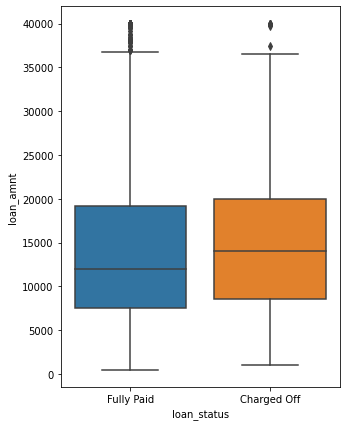

In [17]:
plt.figure(figsize=(5,7))
sns.boxplot(y=df["loan_amnt"],
            x=df["loan_status"])

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

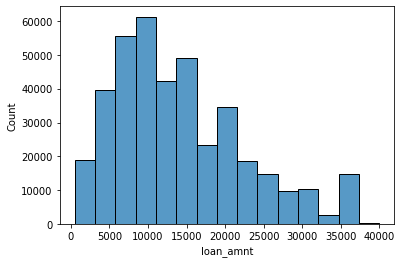

In [18]:
sns.histplot(df["loan_amnt"],bins = 15)

In [19]:
print("Median of loan status with Fully Paid =", df[df["loan_status"] == "Fully Paid"]["loan_amnt"].median())

print("Mean of loan status with Fully Paid =", df[df["loan_status"] == "Fully Paid"]["loan_amnt"].mean())

Median of loan status with Fully Paid = 12000.0
Mean of loan status with Fully Paid = 13866.878771316478


In [20]:
print("median of loan status with Charged off =", df[df["loan_status"] == "Charged Off"]["loan_amnt"].median())

print("Mean of loan status with Charged off =",df[df["loan_status"] == "Charged Off"]["loan_amnt"].mean())

Mean of loan status with Charged off = 14000.0
Mean of loan status with Charged off = 15126.300966873945


For loan status **Charged_off**, the mean and median of loan_amount is **higher than fully paid**. 

2. **term : The number of payments on the loan. Values are in months and can be either 36 or 60.**

In [21]:
df["term"].value_counts(dropna=False)

 36 months    302005
 60 months     94025
Name: term, dtype: int64

####  P[loan_status | term]

In [22]:
pd.crosstab(index=df["term"],
            columns=df["loan_status"], normalize="index" , margins  = True
           ) * 100

loan_status,Charged Off,Fully Paid
term,,
36 months,15.774573,84.225427
60 months,31.941505,68.058495
All,19.612908,80.387092


Observation: 
The conditional probability of loan fully paid given that its 36 month term is higher then charged off. loan fully paid probability when 60 month term is lower than charged off. 

In [23]:
stats.chi2_contingency(pd.crosstab(index=df["term"],
            columns=df["loan_status"]
           ))

(11885.5372266523,
 0.0,
 1,
 array([[ 59231.96314673, 242773.03685327],
        [ 18441.03685327,  75583.96314673]]))

- from above chi-square test , we can reject null hypothesis and conclude that **there exists relatioship between loan_status and term .**

<AxesSubplot:xlabel='term'>

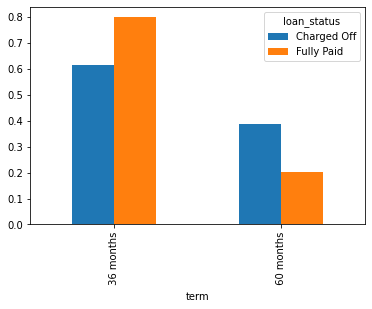

In [24]:
pd.crosstab(index=df["term"],
            columns =df["loan_status"], normalize="columns"
           ).plot(kind = "bar")

later target_encoding for model 

### 3. int_rate : Interest Rate on the loan


<AxesSubplot:xlabel='int_rate', ylabel='Count'>

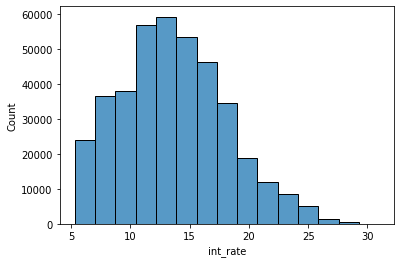

In [25]:
sns.histplot(df["int_rate"],bins = 15)

<AxesSubplot:xlabel='int_rate', ylabel='loan_status'>

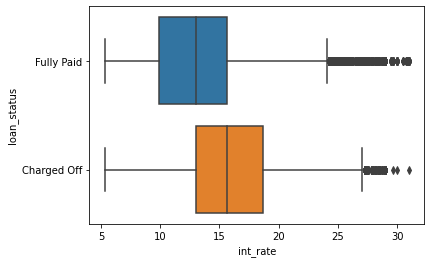

In [26]:
sns.boxplot(x=df["int_rate"],
            y=df["loan_status"])

In [27]:
df[df["loan_status"] == "Charged Off"]["int_rate"].median(),df[df["loan_status"] == "Charged Off"]["int_rate"].mean()


(15.61, 15.882587256833133)

In [28]:
df[df["loan_status"] == "Fully Paid"]["int_rate"].median(),df[df["loan_status"] == "Fully Paid"]["int_rate"].mean()

(12.99, 13.092105403682032)

for charge_off Loan Status,
**interest_rate median and mean is higher than fully paid**.

### 4. installment : The monthly payment owed by the borrower if the loan originates.


In [29]:
df.columns


Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address'], dtype='object')

<AxesSubplot:xlabel='installment', ylabel='Count'>

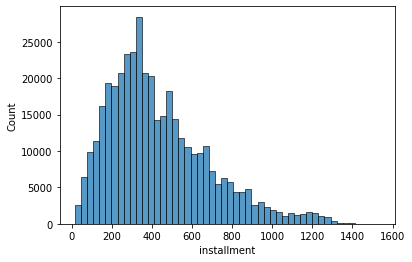

In [30]:
sns.histplot(df["installment"],bins = 50)

<AxesSubplot:xlabel='installment', ylabel='loan_status'>

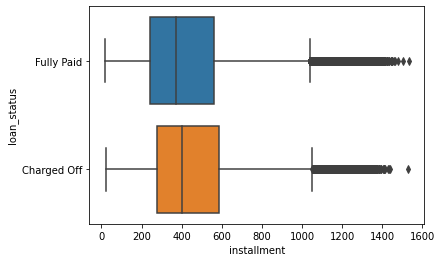

In [31]:
sns.boxplot(x=df["installment"],
            y=df["loan_status"])

distribution of installment,
**its approximately similar for both loan_status.**

In [32]:
stats.ttest_ind(a = df[df["loan_status"]=="Fully Paid"]["installment"],
               b = df[df["loan_status"]=="Charged Off"]["installment"])

Ttest_indResult(statistic=-25.875143861138604, pvalue=1.684401143732544e-147)

From two sample t-test, we can observe the p-value to be < 0.05, 
which is not significant,
hence we reject null hypothesis and can conclude that 
**installments for fully_paid loan status and charged_off status is not same.**

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

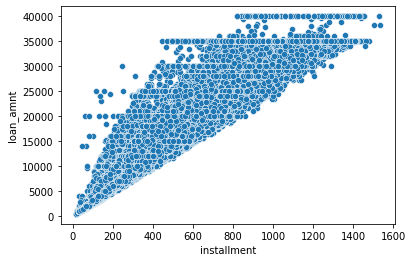

In [33]:
sns.scatterplot(data=df, x="installment", y="loan_amnt")

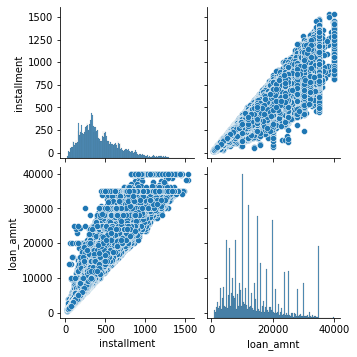

In [34]:
sns.pairplot(df[['installment', "loan_amnt"]])

### 5. grade : LoanTap assigned loan grade

- Loan grades are set based on both the borrower's credit profile and the nature of the contract.


<AxesSubplot:>

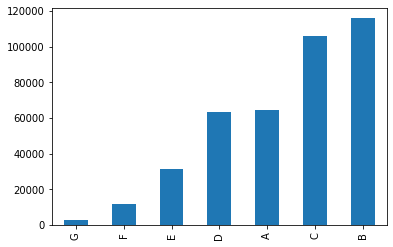

In [35]:
df["grade"].value_counts().sort_values().plot(kind = "bar")

In [36]:
df["grade"].value_counts(dropna=False)

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

In [37]:
pd.crosstab(index = df["grade"],
            columns= df["loan_status"],normalize= "index", margins = True)

loan_status,Charged Off,Fully Paid
grade,,
A,0.062879,0.937121
B,0.125730,0.874270
C,0.211809,0.788191
D,0.288678,0.711322
E,0.373634,0.626366
F,0.427880,0.572120
G,0.478389,0.521611
All,0.196129,0.803871


**probability of loan_status as fully_paid decreases with grade is E,F,G**

<AxesSubplot:xlabel='grade'>

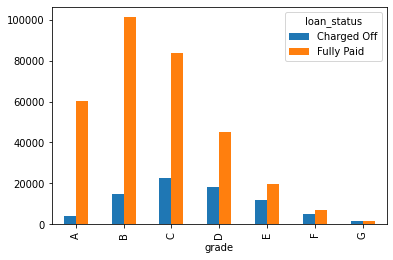

In [38]:
pd.crosstab(index = df["grade"],
            columns= df["loan_status"]).plot(kind  = "bar")

In [39]:
stats.chi2_contingency(pd.crosstab(index = df["grade"],
            columns= df["loan_status"]))


(26338.05812796618,
 0.0,
 6,
 array([[12588.93733051, 51598.06266949],
        [22754.50373457, 93263.49626543],
        [20787.13292175, 85199.86707825],
        [12458.90374972, 51065.09625028],
        [ 6175.71250663, 25312.28749337],
        [ 2308.83154306,  9463.16845694],
        [  598.97821377,  2455.02178623]]))

based on chi-square test also , we can conclude that **there is a relationship between loan_status and LoanTap assigned loan grade.**

later target _encoding 

### 6. sub_grade : LoanTap assigned loan subgrade


In [40]:
pd.crosstab(index = df["sub_grade"],
            columns= df["loan_status"],normalize= "index", margins = True)*100

loan_status,Charged Off,Fully Paid
sub_grade,,
A1,2.867715,97.132285
A2,4.818647,95.181353
A3,5.805598,94.194402
A4,7.023877,92.976123
A5,8.490770,91.509230
B1,9.858200,90.141800
B2,10.851300,89.148700
B3,12.335397,87.664603
B4,13.839303,86.160697


**Similar pattern is observed for sub_grade just like the grade.**

####  7. emp_title :The job title supplied by the Borrower when applying for the loan.


In [41]:
df["emp_title"].value_counts(dropna=False).sort_values(ascending=False).head(15)

NaN                 22927
Teacher              4389
Manager              4250
Registered Nurse     1856
RN                   1846
Supervisor           1830
Sales                1638
Project Manager      1505
Owner                1410
Driver               1339
Office Manager       1218
manager              1145
Director             1089
General Manager      1074
Engineer              995
Name: emp_title, dtype: int64

In [42]:
df["emp_title"].nunique()

173105

**missing values need to be treated** with model based imputation.
total unique job_titles are 173,105. 
we will do target encoding later while creating model. 

In [43]:
pd.crosstab(index = df["emp_title"],
            columns= df["loan_status"],normalize= "index", margins = True).sort_values(by="Charged Off",ascending=False).head(10)

loan_status,Charged Off,Fully Paid
emp_title,,
Peace Health hospital,1.0,0.0
Case Planner,1.0,0.0
Case management director,1.0,0.0
Case and Associates,1.0,0.0
"dr dale brent,inc",1.0,0.0
Sr. Officer/loan service rep.,1.0,0.0
Sr. Office Manager/Legal Administrator,1.0,0.0
Homeless Coordinator,1.0,0.0
Homeless and Runaway Youth Case Manager,1.0,0.0


In [44]:
pd.crosstab(index = df["emp_title"],
            columns= df["loan_status"], margins = True).sort_values(by="Fully Paid",ascending=False).head(30)

loan_status,Charged Off,Fully Paid,All
emp_title,,,
All,71730,301373,373103
Teacher,857,3532,4389
Manager,929,3321,4250
Registered Nurse,380,1476,1856
RN,379,1467,1846
Supervisor,405,1425,1830
Project Manager,246,1259,1505
Sales,399,1239,1638
Office Manager,248,970,1218


### 8. emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.


In [45]:
df["emp_length"].value_counts(dropna=False)

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
NaN           18301
9 years       15314
Name: emp_length, dtype: int64

In [46]:
pd.crosstab(index = df["emp_length"],
            columns= df["loan_status"],normalize= "index", margins = True)*100

loan_status,Charged Off,Fully Paid
emp_length,,
1 year,19.913453,80.086547
10+ years,18.418610,81.581390
2 years,19.326206,80.673794
3 years,19.523133,80.476867
4 years,19.238477,80.761523
5 years,19.218721,80.781279
6 years,18.919438,81.080562
7 years,19.477400,80.522600
8 years,19.976002,80.023998


<AxesSubplot:xlabel='emp_length'>

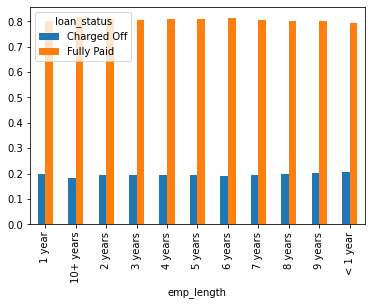

In [47]:
pd.crosstab(index = df["emp_length"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")

In [48]:
stats.chi2_contingency(pd.crosstab(index = df["emp_length"],
            columns= df["loan_status"]))

(122.11317384460878,
 1.88404995201913e-21,
 10,
 array([[  4976.95191526,  20905.04808474],
        [ 24236.9212716 , 101804.0787284 ],
        [  6889.31521011,  28937.68478989],
        [  6088.98780607,  25576.01219393],
        [  4605.82459912,  19346.17540088],
        [  5094.82810428,  21400.17189572],
        [  4007.59813252,  16833.40186748],
        [  4003.36766571,  16815.63233429],
        [  3685.89036055,  15482.10963945],
        [  2944.78949194,  12369.21050806],
        [  6100.52544284,  25624.47455716]]))

visually there doen't seems to be much correlation between employement length and loan_status.
but **from chi-sqaure test, we reject that null hypothesis and hence conclude that there is a relationship exists.**

### 9. home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.


In [49]:
df["home_ownership"].value_counts(dropna=False)

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [50]:
pd.crosstab(index = df["home_ownership"],
            columns= df["loan_status"],normalize= "index", margins = True)*100

loan_status,Charged Off,Fully Paid
home_ownership,,
ANY,0.000000,100.000000
MORTGAGE,16.956057,83.043943
NONE,22.580645,77.419355
OTHER,14.285714,85.714286
OWN,20.680337,79.319663
RENT,22.662244,77.337756
All,19.612908,80.387092


In [51]:
stats.chi2_contingency(pd.crosstab(index = df["home_ownership"],
            columns= df["loan_status"]))

(1860.6350953584301,
 0.0,
 5,
 array([[5.88387243e-01, 2.41161276e+00],
        [3.89018110e+04, 1.59446189e+05],
        [6.08000152e+00, 2.49199985e+01],
        [2.19664571e+01, 9.00335429e+01],
        [7.40308830e+03, 3.03429117e+04],
        [3.13394659e+04, 1.28450534e+05]]))

From chi-sqaure test, we reject that null hypothesis and hence conclude that there is a relationship exists. 


### 10. annual_inc : The self-reported annual income provided by the borrower during registration.


<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

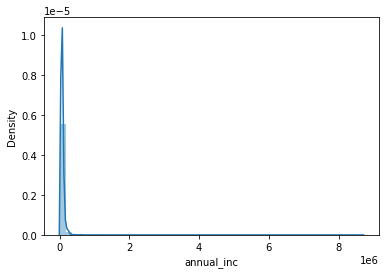

In [52]:
sns.distplot(df["annual_inc"])

In [53]:
df["annual_inc"].describe()

count    3.960300e+05
mean     7.420318e+04
std      6.163762e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.400000e+04
75%      9.000000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64

**annual_inc is right skewed so we will apply log transformation to convert it into normal distribution.**

<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

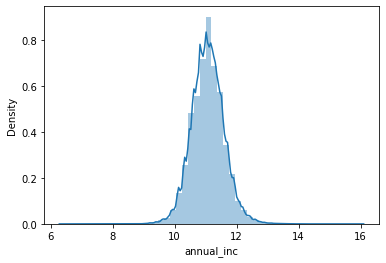

In [54]:
sns.distplot(np.log(df[df["annual_inc"]>0]["annual_inc"]))

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

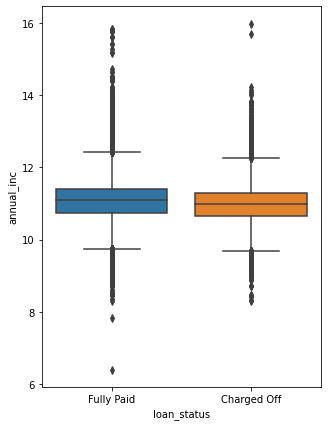

In [55]:
plt.figure(figsize=(5,7))
sns.boxplot(y=np.log(df[df["annual_inc"]>0]["annual_inc"]),
            x=df["loan_status"])

from above boxplot, there seems to be no difference between annual income, for loan status categories 

In [56]:
stats.ttest_ind(a = df[df["loan_status"]=="Fully Paid"]["annual_inc"],
               b = df[df["loan_status"]=="Charged Off"]["annual_inc"])

Ttest_indResult(statistic=33.673505378969445, pvalue=3.1796418761996623e-248)

from t-test , we can reject null hypothsis. 

**concluding annual incomes are not same for both loan_status types.**

###  11. verification_status : 

### Indicates if income was verified by LoanTap, not verified, or if the income source was verified


In [57]:
df["verification_status"].value_counts(dropna=False)

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

In [58]:
pd.crosstab(index = df["verification_status"],
            columns= df["loan_status"],normalize= "index", margins = True)*100

loan_status,Charged Off,Fully Paid
verification_status,,
Not Verified,14.635999,85.364001
Source Verified,21.474293,78.525707
Verified,22.321102,77.678898
All,19.612908,80.387092


<AxesSubplot:xlabel='verification_status'>

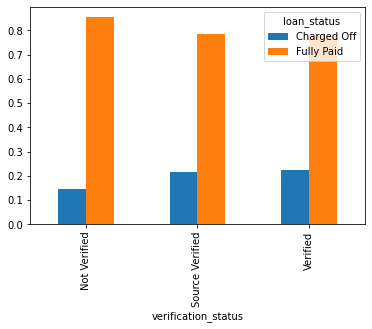

In [59]:
pd.crosstab(index = df["verification_status"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")

In [60]:
stats.chi2_contingency(pd.crosstab(index = df["verification_status"],
            columns= df["loan_status"]))

(2903.0690673128847,
 0.0,
 2,
 array([[ 24532.21772593, 100549.78227407],
        [ 25768.41932429, 105616.58067571],
        [ 27372.36294978, 112190.63705022]]))

Visually there doen't seems to be much correlation between verification_status and loan_status.
but from chi-sqaure test, we reject that null hypothesis and 
**hence conclude that there is a relationship exists.**

#### later  label encoding  
- Verified           1
- Source Verified    2
- Not Verified       0


### 12. issue_d :
### The month which the loan was funded


In [61]:
df["issue_d"].value_counts(dropna=False)

Oct-2014    14846
Jul-2014    12609
Jan-2015    11705
Dec-2013    10618
Nov-2013    10496
Jul-2015    10270
Oct-2013    10047
Jan-2014     9705
Apr-2015     9470
Sep-2013     9179
Aug-2013     9112
Apr-2014     9020
Nov-2014     8858
May-2014     8840
Jul-2013     8631
Oct-2015     8401
May-2015     8325
Mar-2014     8108
Jun-2013     7947
Aug-2014     7860
Feb-2014     7624
Jun-2014     7610
May-2013     7567
Mar-2015     7268
Feb-2015     7167
Aug-2015     7153
Apr-2013     6970
Jun-2015     6844
Dec-2015     6407
Mar-2013     6187
Mar-2016     5945
Nov-2015     5835
Feb-2013     5693
Sep-2015     5419
Jan-2013     5215
Nov-2012     4910
Oct-2012     4833
Sep-2012     4707
Dec-2012     4571
Feb-2016     4336
Sep-2014     4293
Aug-2012     4220
Jan-2016     4133
Jul-2012     3576
Dec-2014     3487
Apr-2016     3027
Jun-2012     2936
May-2012     2644
Apr-2012     2508
Mar-2012     2256
Jun-2016     2152
May-2016     2082
Jan-2012     2050
Feb-2012     1991
Jul-2016     1851
Dec-2011  

### 13. 

###  loan_status : Current status of the loan - Target Variable


<AxesSubplot:>

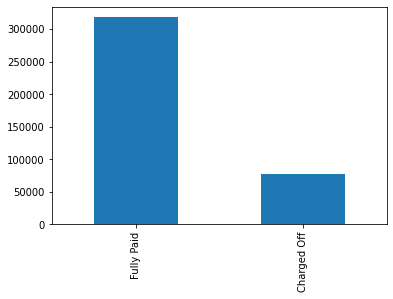

In [62]:
df["loan_status"].value_counts(dropna=False).plot(kind = "bar")


In [63]:
df["loan_status"].value_counts(dropna=False, normalize=True)  * 100

Fully Paid     80.387092
Charged Off    19.612908
Name: loan_status, dtype: float64

**Here the data we have is Imbalanced data.** 

- 80% loans are fully paid.
- 20% loans are charged_off 

### 14. purpose :
### A category provided by the borrower for the loan request.


In [64]:
df["purpose"].nunique()

14

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64


(1397.0679601784623,
 6.573354783158025e-291,
 13,
 array([[9.21218294e+02, 3.77578171e+03],
        [1.62824402e+04, 6.67365598e+04],
        [4.59936424e+04, 1.88513358e+05],
        [5.04051739e+01, 2.06594826e+02],
        [4.71298182e+03, 1.93170182e+04],
        [4.31680108e+02, 1.76931989e+03],
        [1.72397462e+03, 7.06602538e+03],
        [8.22957624e+02, 3.37304238e+03],
        [5.59752398e+02, 2.29424760e+03],
        [4.15499458e+03, 1.70300054e+04],
        [6.45264677e+01, 2.64473532e+02],
        [1.11813189e+03, 4.58286811e+03],
        [4.80908507e+02, 1.97109149e+03],
        [3.55385895e+02, 1.45661410e+03]]))

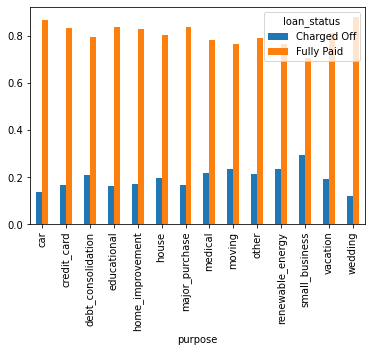

In [65]:
print(df["purpose"].value_counts(dropna=False))
pd.crosstab(index = df["purpose"],
            columns= df["loan_status"],normalize= "index", margins = True)*100
pd.crosstab(index = df["purpose"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")
stats.chi2_contingency(pd.crosstab(index = df["purpose"],
            columns= df["loan_status"]))

<AxesSubplot:>

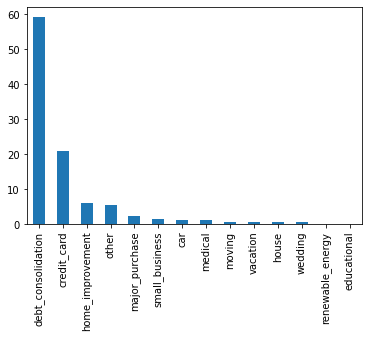

In [66]:
(df["purpose"].value_counts(dropna=False,normalize=True)*100).plot(kind = "bar")


<AxesSubplot:xlabel='purpose'>

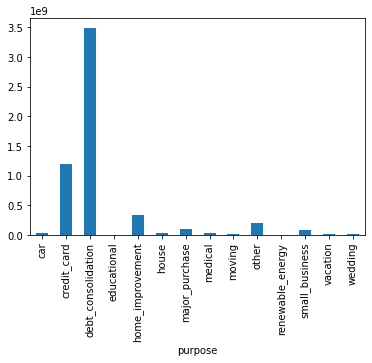

In [67]:
df.groupby(["purpose"])["loan_amnt"].sum().plot(kind = "bar")

**Most of the loans are taken for dept_consolidation, debit_card, home_improvement and others category**

- Number of loan applications and amount per purpose category are highest in above category.

- From chi-sqaure test, we can see the loan_status and loan_purpose are dependnet variables. 

In [68]:
df["purpose"].head(15)

0               vacation
1     debt_consolidation
2            credit_card
3            credit_card
4            credit_card
5     debt_consolidation
6       home_improvement
7            credit_card
8     debt_consolidation
9     debt_consolidation
10    debt_consolidation
11           credit_card
12    debt_consolidation
13    debt_consolidation
14        small_business
Name: purpose, dtype: object

### 15. title :

### The loan title provided by the borrower




In [69]:
df["title"].sample(15)

220789         Debt consolidation
314993                       Debt
340663           Home improvement
26252               consolidation
207178              consolidation
66876     Credit card refinancing
151471         Debt consolidation
250108         Debt consolidation
332082                consoladebt
150286         Debt consolidation
234912    Credit card refinancing
377006         Debt consolidation
259218    Credit card refinancing
160425         Debt consolidation
271094         Debt consolidation
Name: title, dtype: object

Title and purpose are in a way same features. We will drop one of this feature. 


    dti = monthly total dept payment / monthly income excluding mortgages

### 16. dti :
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.


In [70]:
df["dti"].describe().T

count    396030.000000
mean         17.379514
std          18.019092
min           0.000000
25%          11.280000
50%          16.910000
75%          22.980000
max        9999.000000
Name: dti, dtype: float64

<AxesSubplot:xlabel='dti'>

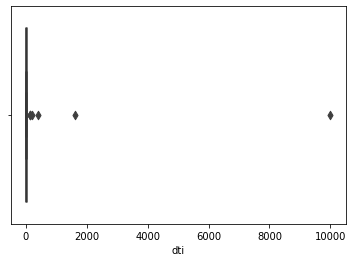

In [71]:
sns.boxenplot((df["dti"]))

**There are lots of outliers in dti column .**

<AxesSubplot:xlabel='loan_status', ylabel='dti'>

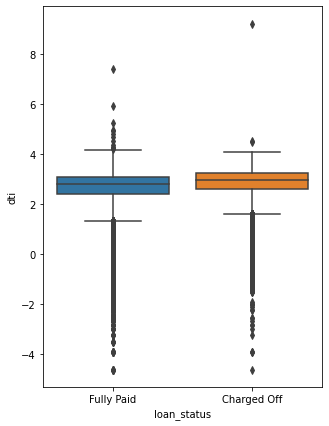

In [72]:
plt.figure(figsize=(5,7))
sns.boxplot(y=np.log(df[df["dti"]>0]["dti"]),
            x=df["loan_status"])

issue_d :
    The month which the loan was funded¶

### 17. earliest_cr_line :
The month the borrower's earliest reported credit line was opened


In [73]:
pd.to_datetime(df["earliest_cr_line"])

0        1990-06-01
1        2004-07-01
2        2007-08-01
3        2006-09-01
4        1999-03-01
            ...    
396025   2004-11-01
396026   2006-02-01
396027   1997-03-01
396028   1990-11-01
396029   1998-09-01
Name: earliest_cr_line, Length: 396030, dtype: datetime64[ns]

In [74]:
# The month which the loan was funded

In [75]:
pd.to_datetime(df["issue_d"])

0        2015-01-01
1        2015-01-01
2        2015-01-01
3        2014-11-01
4        2013-04-01
            ...    
396025   2015-10-01
396026   2015-02-01
396027   2013-10-01
396028   2012-08-01
396029   2010-06-01
Name: issue_d, Length: 396030, dtype: datetime64[ns]

In [76]:
df["Loan_Tenure"] = ((pd.to_datetime(df["issue_d"]) -pd.to_datetime(df["earliest_cr_line"]))/np.timedelta64(1, 'M'))

<AxesSubplot:ylabel='Count'>

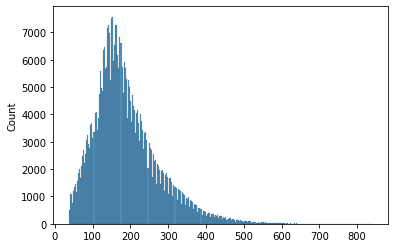

In [77]:
sns.histplot(((pd.to_datetime(df["issue_d"]) -pd.to_datetime(df["earliest_cr_line"]))/np.timedelta64(1, 'M')))


A above plot is a bit right skewed.

<AxesSubplot:xlabel='loan_status'>

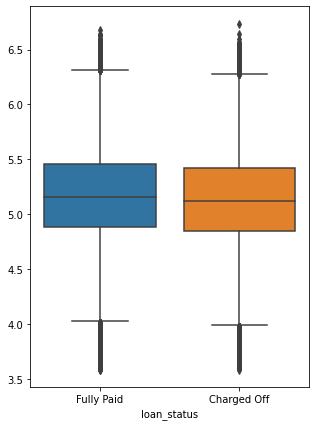

In [78]:
plt.figure(figsize=(5,7))
sns.boxplot(y=np.log(((pd.to_datetime(df["issue_d"]) -pd.to_datetime(df["earliest_cr_line"]))/np.timedelta64(1, 'M'))),
            x=df["loan_status"])

18. open_acc : The number of open credit lines in the borrower's credit file.


In [79]:
df["open_acc"].nunique()

61

<AxesSubplot:xlabel='open_acc', ylabel='Count'>

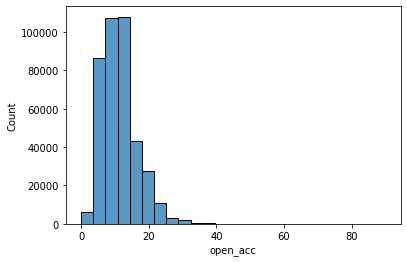

In [80]:
sns.histplot(df["open_acc"],bins = 25)


<AxesSubplot:xlabel='loan_status', ylabel='open_acc'>

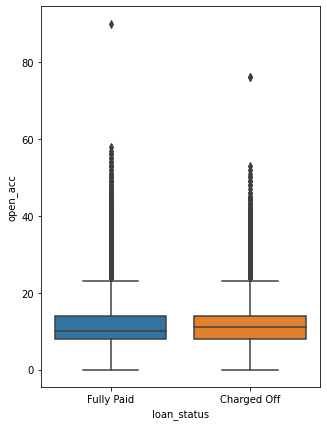

In [81]:
plt.figure(figsize=(5,7))
sns.boxplot(y= df["open_acc"],
            x=df["loan_status"])

### 19.
### pub_rec : Number of derogatory public records



“Derogatory” is seen as negative to lenders, and can include late payments, collection accounts, bankruptcy, charge-offs and other negative marks on your credit report. This can impact your ability to qualify for new credit.

In [82]:
df["pub_rec"].describe()

count    396030.000000
mean          0.178191
std           0.530671
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          86.000000
Name: pub_rec, dtype: float64

<AxesSubplot:xlabel='loan_status', ylabel='pub_rec'>

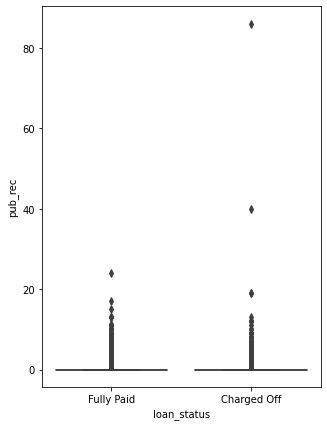

In [83]:
plt.figure(figsize=(5,7))
sns.boxplot(y= df["pub_rec"],
            x=df["loan_status"])

There are alot of outlier values

### 20.

### revol_bal : Total credit revolving balance


With revolving credit, a consumer has a line of credit he can keep using and repaying over and over. The balance that carries over from one month to the next is the revolving balance on that loan.




In [84]:
df["revol_bal"].describe().round(3)

count     396030.000
mean       15844.540
std        20591.836
min            0.000
25%         6025.000
50%        11181.000
75%        19620.000
max      1743266.000
Name: revol_bal, dtype: float64

<AxesSubplot:xlabel='revol_bal', ylabel='Count'>

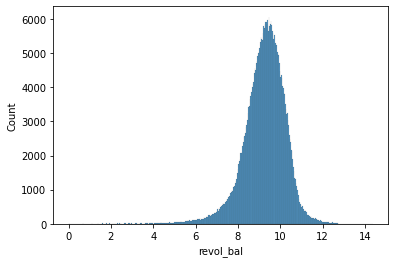

In [85]:
sns.histplot(np.log(df["revol_bal"]))


<AxesSubplot:xlabel='loan_status', ylabel='revol_bal'>

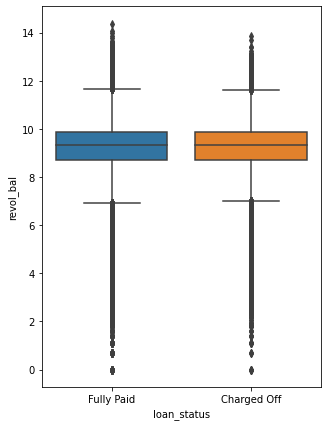

In [86]:
plt.figure(figsize=(5,7))
sns.boxplot(y= np.log(df["revol_bal"]),
            x=df["loan_status"])

### 21. revol_util :
### Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


Your credit utilization rate, sometimes called your credit utilization ratio, is the amount of revolving credit you're currently using divided by the total amount of revolving credit you have available. In other words, it's how much you currently owe divided by your credit limit. It is generally expressed as a percent.

<AxesSubplot:xlabel='revol_util', ylabel='Count'>

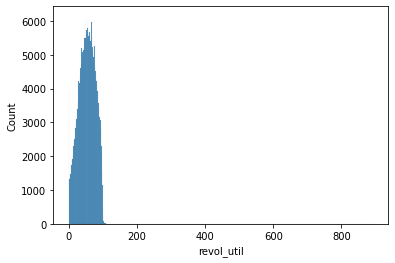

In [87]:
sns.histplot(df["revol_util"])

In [88]:
df["revol_util"].describe()

count    395754.000000
mean         53.791749
std          24.452193
min           0.000000
25%          35.800000
50%          54.800000
75%          72.900000
max         892.300000
Name: revol_util, dtype: float64

22. total_acc : The total number of credit lines currently in the borrower's credit file


In [89]:
df["total_acc"].value_counts()

21.0     14280
22.0     14260
20.0     14228
23.0     13923
24.0     13878
19.0     13876
18.0     13710
17.0     13495
25.0     13225
26.0     12799
16.0     12771
27.0     12343
15.0     12283
28.0     11706
14.0     11524
29.0     11274
13.0     10936
30.0     10587
31.0      9869
12.0      9858
32.0      9552
11.0      8844
33.0      8682
34.0      8088
10.0      7672
35.0      7406
36.0      6971
9.0       6362
37.0      6362
38.0      5707
39.0      5428
8.0       5365
40.0      4896
41.0      4391
7.0       4143
42.0      4072
43.0      3637
44.0      3408
45.0      2991
6.0       2923
46.0      2626
47.0      2426
48.0      2197
5.0       2028
49.0      1912
50.0      1747
51.0      1529
52.0      1447
53.0      1245
4.0       1238
54.0      1066
63.0      1025
55.0       993
56.0       864
57.0       758
58.0       715
59.0       645
60.0       582
62.0       556
61.0       541
3.0        327
64.0       234
65.0       178
66.0       141
67.0       136
68.0       132
69.0      

23. initial_list_status : The initial listing status of the loan. Possible values are – W, F


In [90]:
df["initial_list_status"].value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

f    238066
w    157964
Name: initial_list_status, dtype: int64


(35.61125549485254,
 2.408916483118551e-09,
 1,
 array([[ 46691.66582835, 191374.33417165],
        [ 30981.33417165, 126982.66582835]]))

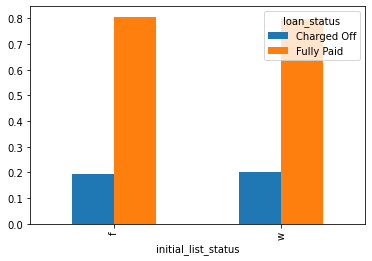

In [91]:
print(df["initial_list_status"].value_counts(dropna=False))
pd.crosstab(index = df["initial_list_status"],
            columns= df["loan_status"],normalize= "index", margins = True)*100
pd.crosstab(index = df["initial_list_status"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")
stats.chi2_contingency(pd.crosstab(index = df["initial_list_status"],
            columns= df["loan_status"]))

24. application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers


In [92]:
df["application_type"].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64


(59.601902791548355,
 1.1418557766942247e-13,
 2,
 array([[5.60929172e+01, 2.29907083e+02],
        [7.75335522e+04, 3.17785448e+05],
        [8.33548595e+01, 3.41645141e+02]]))

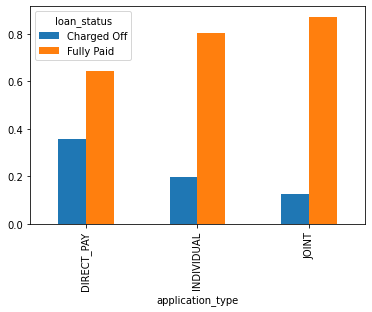

In [93]:
print(df["application_type"].value_counts(dropna=False))
pd.crosstab(index = df["application_type"],
            columns= df["loan_status"],normalize= "index", margins = True)*100
pd.crosstab(index = df["application_type"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")
stats.chi2_contingency(pd.crosstab(index = df["application_type"],
            columns= df["loan_status"]))

25. mort_acc : Number of mortgage accounts.


In [94]:
df["mort_acc"].value_counts(dropna=False)

0.0     139777
1.0      60416
2.0      49948
3.0      38049
NaN      37795
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

26. pub_rec_bankruptcies : Number of public record bankruptcies


In [95]:
df["pub_rec_bankruptcies"].value_counts()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

0.0    350380
1.0     42790
2.0      1847
NaN       535
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64
loan_status           Charged Off  Fully Paid
pub_rec_bankruptcies                         
0.0                     19.499115   80.500885
1.0                     20.394952   79.605048
2.0                     23.226854   76.773146
3.0                     21.082621   78.917379
4.0                     31.707317   68.292683
5.0                     15.625000   84.375000
6.0                     28.571429   71.428571
7.0                     25.000000   75.000000
8.0                     50.000000   50.000000
All                     19.617441   80.382559


(44.77652714609038,
 4.056824231550618e-07,
 8,
 array([[6.87355913e+04, 2.81644409e+05],
        [8.39430319e+03, 3.43956968e+04],
        [3.62334143e+02, 1.48466586e+03],
        [6.88572194e+01, 2.82142781e+02],
        [1.60863020e+01, 6.59136980e+01],
        [6.27758126e+00, 2.57224187e+01],
        [1.37322090e+00, 5.62677910e+00],
        [7.84697657e-01, 3.21530234e+00],
        [3.92348829e-01, 1.60765117e+00]]))

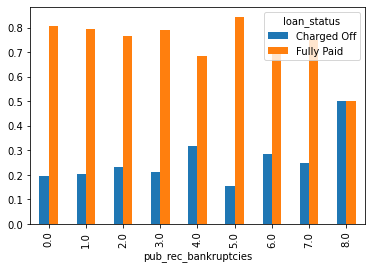

In [96]:
print(df["pub_rec_bankruptcies"].value_counts(dropna=False))
print(pd.crosstab(index = df["pub_rec_bankruptcies"],
            columns= df["loan_status"],normalize= "index", margins = True)*100)
pd.crosstab(index = df["pub_rec_bankruptcies"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")
stats.chi2_contingency(pd.crosstab(index = df["pub_rec_bankruptcies"],
            columns= df["loan_status"]))

27. Address: Address of the individual

In [97]:
df["address"][10]

'40245 Cody Drives\nBartlettfort, NM 00813'

    missing values:

    emp_title               5.789208
    emp_length              4.621115
    revol_util              0.069692
    mort_acc                9.543469
    pub_rec_bankruptcies    0.135091

In [98]:
data = pd.read_csv("logistic_regression.txt")
data["sub_grade"]

0         B4
1         B5
2         B3
3         A2
4         C5
          ..
396025    B4
396026    C1
396027    B1
396028    C2
396029    C2
Name: sub_grade, Length: 396030, dtype: object

In [99]:
data["sub_grade"].value_counts()

B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64

In [100]:
df.columns


Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address', 'Loan_Tenure'], dtype='object')

In [101]:
# EMi 

In [102]:
# df["term"] = df["term"].str.split().apply(lambda x:x[0]).astype("int")

In [103]:
# EMI 
# df["loan_amnt"] / df["term"]

In [104]:
# (df["loan_amnt"] / df["term"])/12

In [105]:
# (((df["annual_inc"]/12)*0.1 ) > ((df["loan_amnt"] / df["term"])/12)).value_counts()

In [106]:
# df["annual_inc"]

### Data Preprocessing (20 Points)
- Duplicate value check
- Missing value treatment
- Outlier treatment
- Feature engineering
- Data preparation for modeling

# dropping unimportant columns 

In [107]:
df.drop(["address"],axis = 1, inplace=True)

In [108]:
df.drop(["title"],axis = 1, inplace=True)

In [109]:
df.drop(["emp_title"],axis = 1, inplace=True)

In [110]:
df.drop(["issue_d","earliest_cr_line"],axis = 1,inplace=True)

# Missing value imputation : 

In [111]:
def missing_df(data):
    total_missing_df = data.isna().sum().sort_values(ascending = False)
    percentage_missing_df = ((data.isna().sum()/len(data)*100)).sort_values(ascending = False)
    missingDF = pd.concat([total_missing_df, percentage_missing_df],axis = 1, keys=['Total', 'Percent'])
    return missingDF
    

In [112]:
missing_data = missing_df(df)
missing_data[missing_data["Total"]>0]


,Total,Percent
mort_acc,37795,9.543469
emp_length,18301,4.621115
pub_rec_bankruptcies,535,0.135091
revol_util,276,0.069692


In [113]:
missing_data[missing_data["Total"]>0].index

Index(['mort_acc', 'emp_length', 'pub_rec_bankruptcies', 'revol_util'], dtype='object')

In [114]:
from sklearn.impute import SimpleImputer

In [115]:

num_missing = ['mort_acc',   'pub_rec_bankruptcies', 'revol_util']

median_imputer = SimpleImputer(strategy= "median")

In [116]:

for i in num_missing:
    df[i] = pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(df[i])))
    

In [117]:
missing_data = missing_df(df)
missing_data[missing_data["Total"]>0]


,Total,Percent
emp_length,18301,4.621115


In [118]:
categorical_minssing  = missing_data[missing_data["Total"]>0].index

In [119]:
freq_imputer = SimpleImputer(strategy= "most_frequent")
for i in categorical_minssing:
    df[i] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(df[i])))

In [120]:
# df.dtypes == "object"

In [121]:
# df["grade"].unique()

In [122]:
# df["grade"].value_counts()

In [123]:
# df["grade"].replace({"A":1, "B":2,"C":3,"D":4,"E":5,"F":6,"G":7}, inplace=True)

In [124]:
# df["grade"].value_counts()

In [125]:
# len(sorted(df["sub_grade"].unique()))

In [126]:
# df["sub_grade"].value_counts()

In [127]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

In [128]:
LabelEncoder.fit_transform(df["sub_grade"])

array([ 8,  9,  7, ...,  5, 11, 11])

In [129]:
df["sub_grade"] = LabelEncoder.fit_transform(df["sub_grade"])
df["grade"] = LabelEncoder.fit_transform(df["grade"])

In [130]:
df["loan_status"].replace({"Fully Paid":0,
                          "Charged Off" : 1},inplace=True)

In [131]:
categorical_target_en  = ["term","emp_length","home_ownership","verification_status","purpose","initial_list_status","application_type"]
categorical_target_en

['term',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status',
 'application_type']

In [132]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,Loan_Tenure
0,10000.0,36 months,11.44,329.48,1,8,10+ years,RENT,117000.0,Not Verified,0,vacation,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,295.036859
1,8000.0,36 months,11.99,265.68,1,9,4 years,MORTGAGE,65000.0,Not Verified,0,debt_consolidation,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,126.031335
2,15600.0,36 months,10.49,506.97,1,7,< 1 year,RENT,43057.0,Source Verified,0,credit_card,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,89.036736
3,7200.0,36 months,6.49,220.65,0,1,6 years,RENT,54000.0,Not Verified,0,credit_card,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,98.006119
4,24375.0,60 months,17.27,609.33,2,14,9 years,MORTGAGE,55000.0,Verified,1,credit_card,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,169.038379


In [133]:
from category_encoders import TargetEncoder
TEncoder = TargetEncoder()


In [134]:
# df["loan_status"]

In [135]:
categorical_target_en

['term',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status',
 'application_type']

In [136]:
# TEncoder.fit_transform(df["term"],df["loan_status"])


In [137]:
for col in categorical_target_en:
    from category_encoders import TargetEncoder
    TEncoder = TargetEncoder()
    
    df[col] = TEncoder.fit_transform(df[col],df["loan_status"])


In [138]:
df.sample(5).T

,346850,276540,312137,72894,224841
loan_amnt,3000.000000,13000.000000,18000.000000,12000.000000,3500.000000
term,0.157746,0.157746,0.157746,0.157746,0.157746
int_rate,13.920000,6.030000,10.150000,10.990000,14.990000
installment,102.420000,395.670000,582.080000,392.810000,121.320000
grade,2.000000,0.000000,1.000000,1.000000,2.000000
sub_grade,13.000000,0.000000,6.000000,6.000000,14.000000
emp_length,0.189194,0.206872,0.195737,0.199135,0.195737
home_ownership,0.206803,0.169561,0.226622,0.226622,0.226622
annual_inc,65000.000000,50000.000000,117000.000000,57000.000000,45500.000000
verification_status,0.146360,0.146360,0.146360,0.214743,0.223211


In [139]:
for_scaling = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',  'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'Loan_Tenure']

In [140]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()

In [141]:
for col in for_scaling:
    from sklearn.preprocessing import StandardScaler
    StandardScaler = StandardScaler()
    
    df[col] = pd.Series(StandardScaler.fit_transform(df[col].values.reshape(-1,1)).ravel())


In [142]:
df.sample(5).T

,319518,382939,29193,217419,40006
loan_amnt,-0.252935,1.302567,-0.540105,-0.252935,1.182913
term,1.792196,-0.557975,-0.557975,-0.557975,1.792196
int_rate,0.440638,-0.558881,-1.569580,-1.059758,1.795690
installment,-0.568385,1.548615,-0.546768,-0.202649,0.903412
grade,0.882934,-0.616534,-1.366267,-1.366267,2.382401
sub_grade,0.593327,-0.770114,-1.527580,-1.073100,2.411247
emp_length,-0.096408,-0.968063,2.638182,-1.703055,-0.096408
home_ownership,0.392211,-0.976244,-0.976244,1.120447,-0.976244
annual_inc,-0.230431,0.515868,1.797554,-0.068192,-0.246654
verification_status,0.796620,-1.463966,-1.463966,0.796620,0.547529


#### Model building (10 Points)
Build the Logistic Regression model and comment on the model statistics

Display model coefficients with column names

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X = df.drop(["loan_status"], axis = 1).values
y = df["loan_status"].values

In [145]:
X_train , X_test , y_train , y_test = train_test_split(X,y,
                                                      random_state=2,
                                                      test_size=0.2)

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
LogisticRegression = LogisticRegression(penalty='l2',
    
    dual=False,
    tol=0.0001,
    C=10000,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None)

In [148]:
y_train

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [149]:
LogisticRegression.fit(X_train , y_train)

LogisticRegression(C=10000)

In [150]:
LogisticRegression.coef_

array([[-0.01979528,  0.18505113, -0.28583714,  0.07879292, -0.01891271,
         0.75379844,  0.01899368,  0.12006474, -0.19777955,  0.06661888,
         0.05018158,  0.421953  ,  0.11519821,  0.05420097, -0.06451779,
         0.08520967, -0.11397708,  0.00654421,  0.00098199, -0.05894631,
        -0.02783981,  0.02614786]])

In [151]:
LogisticRegression.intercept_

array([-1.57634623])

In [152]:
LogisticRegression.coef_

array([[-0.01979528,  0.18505113, -0.28583714,  0.07879292, -0.01891271,
         0.75379844,  0.01899368,  0.12006474, -0.19777955,  0.06661888,
         0.05018158,  0.421953  ,  0.11519821,  0.05420097, -0.06451779,
         0.08520967, -0.11397708,  0.00654421,  0.00098199, -0.05894631,
        -0.02783981,  0.02614786]])

In [153]:
df.drop(["loan_status"], axis = 1).columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'Loan_Tenure'], dtype='object')

In [154]:
feature_importance = pd.DataFrame(index = df.drop(["loan_status"], axis = 1).columns, data = LogisticRegression.coef_.ravel()).reset_index()
feature_importance.sort_values(by = [0], ascending = False)

,index,0
5,sub_grade,0.753798
11,dti,0.421953
1,term,0.185051
7,home_ownership,0.120065
12,open_acc,0.115198
15,revol_util,0.085210
3,installment,0.078793
9,verification_status,0.066619
13,pub_rec,0.054201
10,purpose,0.050182


<AxesSubplot:xlabel='0', ylabel='index'>

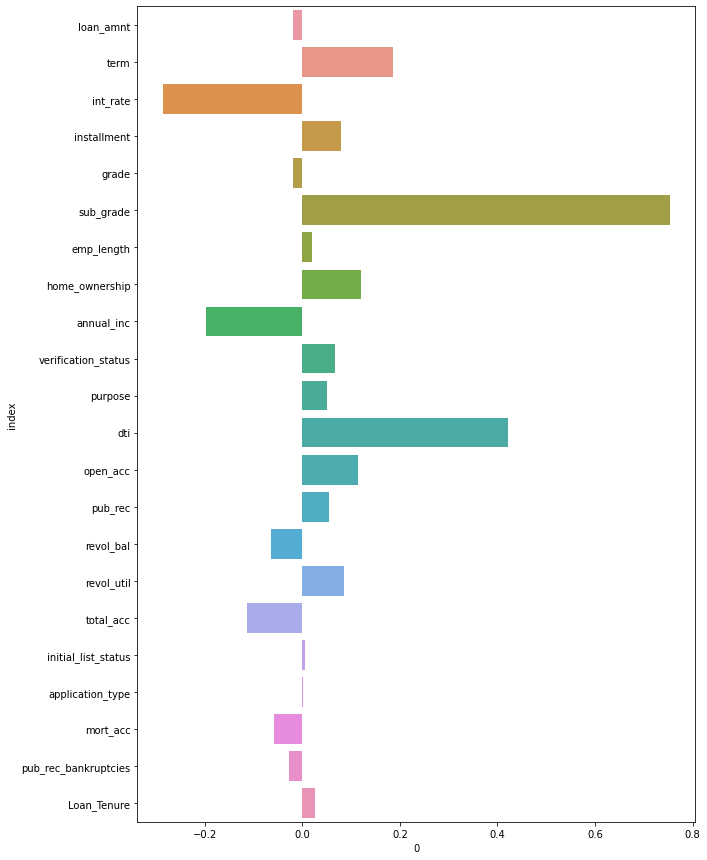

In [155]:
plt.figure(figsize=(10,15))
sns.barplot(y = feature_importance["index"],
           x =  feature_importance[0])

In [156]:
LogisticRegression.score(X_train,y_train)

0.8052104638537485

In [157]:
LogisticRegression.score(X_test,y_test)

0.8059490442643235

<AxesSubplot:>

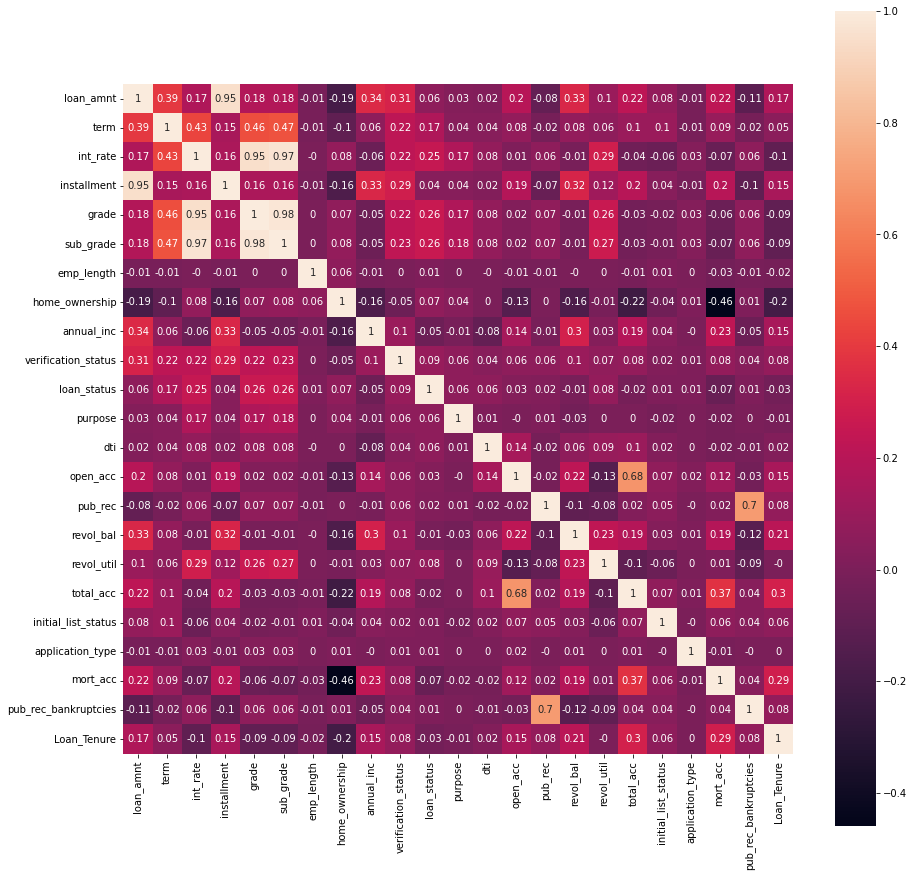

In [158]:
plt.figure(figsize=(15,15))

sns.heatmap(df.corr().round(2),annot=True,square=True)

## Metrics : 

In [159]:
from sklearn.metrics  import confusion_matrix, f1_score, precision_score,recall_score
from sklearn.metrics import classification_report

### Classification Report 

In [160]:
print(classification_report(y_test, LogisticRegression.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89     63636
           1       0.54      0.08      0.15     15570

    accuracy                           0.81     79206
   macro avg       0.68      0.53      0.52     79206
weighted avg       0.76      0.81      0.74     79206



In [161]:
confusion_matrix(y_test, LogisticRegression.predict(X_test))

array([[62531,  1105],
       [14265,  1305]], dtype=int64)

In [162]:
pd.crosstab(y_test ,LogisticRegression.predict(X_test))

col_0,0,1
row_0,,
0,62531,1105
1,14265,1305


In [163]:
precision_score(y_test ,LogisticRegression.predict(X_test))

0.5414937759336099

In [164]:
recall_score(y_test ,LogisticRegression.predict(X_test))

0.0838150289017341

In [165]:
f1_score(y_test ,LogisticRegression.predict(X_test))

0.14516129032258063

In [166]:
f1_score(y_train ,LogisticRegression.predict(X_train))

0.13965872971616572

In [167]:
from sklearn.metrics import ConfusionMatrixDisplay

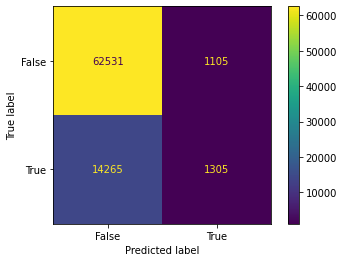

In [168]:
cm_display  = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_test, 
                                                          LogisticRegression.predict(X_test)),display_labels=[False,True])
cm_display.plot()
plt.show()

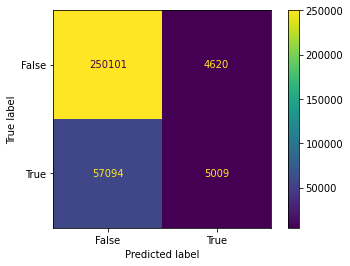

In [169]:
cm_display  = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_train, 
                                                          LogisticRegression.predict(X_train)),display_labels=[False,True])
cm_display.plot()
plt.show()

### ROC AUC Curve

In [170]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

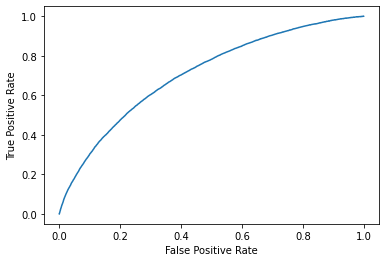

In [171]:
plot_roc_curve(y_test, LogisticRegression.decision_function(X_test))

### Precision Recall Curve

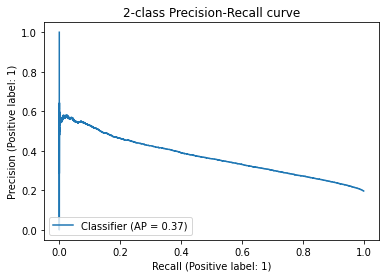

In [172]:
from sklearn.metrics import PrecisionRecallDisplay
y_score = LogisticRegression.decision_function(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score)
_ = display.ax_.set_title("2-class Precision-Recall curve")

Questionnaire

- What percentage of customers have fully paid their Loan Amount?: Fully Paid 80.387092
    - Fully Paid     80.387092
    - Charged Off    19.612908


- Comment about the correlation between Loan Amount and Installment features. Higher the loan higher the instalment amount. There is a positive correlation.


- The majority of people have home ownership as MORTGAGE.

- People with grades ‘A’ are more likely to fully pay their loan. (T/F) TRUE

- Name the top 2 afforded job titles. TEACHER, MANAGER

- Thinking from a bank's perspective, which metric should our primary focus be on.
ROC AUC
Precision
Recall
F1 Score

    Identifying good customers for a bank loan: Although Precision seems more important but recall cannot be ignored completely. For a bank, if it misses out to identify/classifying a good customer eligible for the loan is okay (low recall), but approving a loan to a bad customer (false positive) who may never repay it is undesirable. We need to consider F-0.5 score to give more weighted importance to precision than recall.

- Which were the features that heavily affected the outcome?
    - sub_grade: LoanTap assigned loan subgrade
    - dti:  A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
    - term	 The number of payments on the loan. Values are in months and can be either 36 or 60.
    - home_ownership: The homeownership status provided by the borrower during registration or obtained from the credit report.
    - open_acc:  The number of open credit lines in the borrower's credit file.

- Will the results be affected by geographical location? (Yes/No): YES

### Tradeoff Questions:

##### **How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.**
- To identify real defaulters we need to identify False Positives. We can use various other classification algorithms like SVM, Decision Trees, Random Forrest. Further hyperparameter tuning can be done to better tune the model. 
- In case of imbalance data for defaulters oversampling technique can be used to better capture the underlying patterns of defaulters.


#####  **Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.**
- It's very important to identify the defaulters. The company LoanTap should not disburse loans to everyone that is true. But at the same time if False Negatives are increasing then the oportunity cost increases. Company must do a detailed analysis on loss due to defaulters, loss due to opportunity cost, profit due to loan disbursement. Based on the above paramters company should decide a threhold for the percentage of deefaulters which it can accept considering the profit with non-defaulters and company's target for the profit.

### Actionable insights and recommendations

- Around 80.26% of customers have fully paid their Loan Amount. The defaulters are ~ 20%. From Personal loan business perspective this ratio is high. These 20% will contribute in NPAs of LoanTap. To reduce the risk of NPAs,
- LoanTap should add slightly stringent rules to bring down this ratio to 5% to 6%.
- LoanTap should provide loans at slightly higher rate than other Banks. This will offset the risks of defaulters and maintain the profitability of the business.

- precision    recall  f1-score   support

               0       0.81      0.98      0.89     63636
               1       0.54      0.08      0.15     15570

            accuracy                           0.81     79206
            macro avg       0.68      0.53      0.52     79206
      weighted avg       0.76      0.81      0.74     79206


- However this model has slightly low capability on correctly identifying defaulters. Overall data has 20% defaulters, model is able to predict 10% of them correctly.

- Using this model, LoanTap can easily reduce the ration of defaulters in their portfolio.
- emp_title **Owner & Driver** has negative Coefficient. 
- emp_title **Techer, Project Manager** has positive Coefficient. LoanTap can also decide their social media based marketing based on person's job-titles.
- application_type **JOINT** has positive Coefficient. Which means LoanTap can promote persons to apply for joint loan. Because of this, chances of default will reduce.
- Purpose has negative Coefficient. This means LoanTap should stick to giving loans to conventional purposes like Marriage, car etc.
- term 60 months has negative Coefficient. Which means LoanTap should focus more on Loans for shorter duration (i.e. 36 months). Marketing campaign and promotional strategies should be based on this.